## Challenge: Feature Selection / Prepare a dataset for modeling

Working through the stages of model preparation, do the following:  

- Using a dataset of your choice, select an outcome variable 
    - outcome variable: 'isFraud'
- Pick four or five  variables to act as the basis for features. 
    - one to two categorical - "type" and "step" in this dataset
    - three to four continuous - "amount", 'oldbalanceOrg, 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'

- Explore the variables using the univariate and bivariate methods you've learned so far.

- Create ten new features. Explain the reasoning behind each one.

- Using filtering methods, select the five best features and justify your choices.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing 

In [4]:
# Original paysim data has 6.36M entries, and was taking longer to load,
# the following "paysimhf.csv" is half of the data containing about 3.18 mln entries
#data1 = data.iloc[:3181300]
#data1.to_csv("paysimhf.csv")

#data found here - https://www.kaggle.com/ntnu-testimon/paysim1/home
# thesis - http://bth.diva-portal.org/smash/record.jsf?pid=diva2%3A955852&dswid=-8842

data = pd.read_csv("paysimhf.csv", index_col=0)
data.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Dataset description 

The Mobile Money Payment Simulation case study is based on a real company that has developed a mobile money implementation that provides mobile phone users with the ability to transfer money between themselves using the phone as a sort of electronic wallet. 

### Attribute description
- step: Maps a unit of time in the real world. In this case 1 step is 1 hour of time.
- type: CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER
    - CASH-IN is the process of increasing the balance of account by paying in cash to a merchant.
    - CASH-OUT is the opposite process of CASH-IN, it means to withdraw cash from a merchant which decreases the balance of the account.
    - DEBIT is similar process than CASH-OUT and involves sending the money from the mobile money service to a bank account.
    - PAYMENT is the process of paying for goods or services to merchants which decreases the balance of the account and increases the balance of the receiver.
    - TRANSFER is the process of sending money to another user of the service through the mobile money platform
- amount: amount of the transaction in local currency
- nameOrigcustomer:  who started the transaction
- oldbalanceOrg: initial balance before the transaction
- newbalanceOrig: customer's balance after the transaction.
- nameDest: recipient ID of the transaction.
- oldbalanceDest: initial recipient balance before the transaction.
- newbalanceDest: recipient's balance after the transaction.
- isFraud: identifies a fraudulent transaction (1) and non fraudulent (0)
- isFlaggedFraud: flags illegal attempts to transfer more than 200,000 in a single transaction.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3181300 entries, 0 to 3181299
Data columns (total 11 columns):
step              int64
type              object
amount            float64
nameOrig          object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest          object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: float64(5), int64(3), object(3)
memory usage: 291.3+ MB


In [6]:
#data1 = data.iloc[:1000000]

# selecting a subset for steps 1-12, indicating transaction within the first 12 hours 
#data12 = data.loc[lambda df: df.step <= 12]

In [10]:
# selecting a range of features for steps 1-12, indicating transaction within the first 12 hours.   

df = data.loc[lambda df: df.step <= 12, 
    ['step','type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']
]

#df.head(20)

In [162]:
# Transforming qualitative values of variable 'type' to numerical ones

type_num = pd.Series(sorted(df['type'].unique())).to_dict()
num_values = dict([(value,key) for key,value in type_num.items()])
print(num_values)

df['type'] = df['type'].map(num_values)
print(df.type.value_counts())

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
3    67724
1    60040
0    37506
4    15244
2     1597
Name: type, dtype: int64


In [14]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1
3,1,1,181.00,181.0,0.00,21182.0,0.0,1
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182111 entries, 0 to 182110
Data columns (total 8 columns):
step              182111 non-null int64
type              182111 non-null int64
amount            182111 non-null float64
oldbalanceOrg     182111 non-null float64
newbalanceOrig    182111 non-null float64
oldbalanceDest    182111 non-null float64
newbalanceDest    182111 non-null float64
isFraud           182111 non-null int64
dtypes: float64(5), int64(3)
memory usage: 12.5 MB


## Data exploration 

In this **subset**(df) I have the following: 

* How many variables do I have?   
    - 8 variables
        
* How many datapoints?
    - 182110 data points 
        
* Variable types:

    - Categorical variables:
        - 'step': 1 - 12
        - 'type': 0 - 4
        - 'isFraud' 0-1, outcome variable
            
    - Continuous variables: 
        - 'oldbalanceOrg'
        - 'newbalanceOrig'
        - 'oldbalanceDest'
        - 'newbalanceDest'
            
* Do any of my variables have a known probability distribution (normal, Poisson, Gamma, etc)?
    - Not sure 
        
* Do I have missing data? If so, how much?  
    - no null values 

* How much variance is there in each of my variables?

In [13]:
df.iloc[:,:].isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

### <font color='red'>PB: need help in understanding the following scatterplot matrix </font>

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


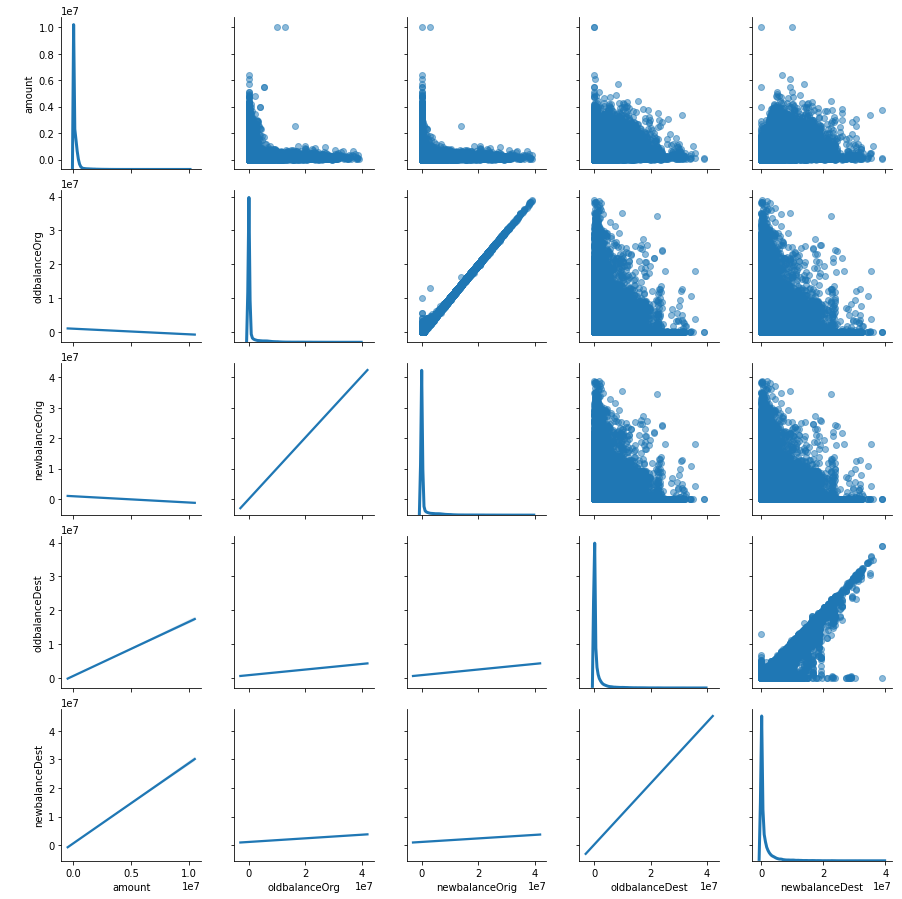

In [16]:
# Making a scatterplot matrix for the continuous variables 

df1 = df.loc[:, 'amount':'newbalanceDest']  #selecting a subset of cont. vbls.
g = sns.PairGrid(df1, diag_sharey=False)

g.map_upper(plt.scatter, alpha=.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot, lw=3)
plt.show()

### <font color='red'>PB: Also need help in understanding  </font>


Looking at the following list of distributions it seems this has log normal kind of distribution - skewed to the left. -- 

![distribution example](distribution.png)

   type variable  value
0     3     step    1.0
1     3     step    1.0
2     4     step    1.0
3     1     step    1.0
4     3     step    1.0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


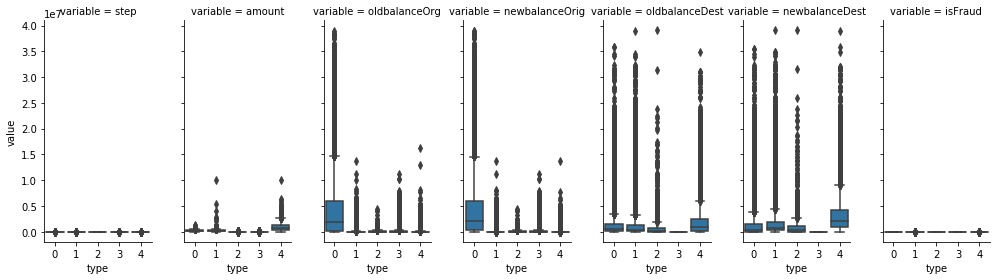

In [21]:
# boxplot for one cont. and one categ. vbl.

df2 = df
df2 = pd.melt(df2, id_vars=['type'])
print(df2.head())

g = sns.FacetGrid(df2, col="variable", size=4, aspect=.5)
g = g.map(sns.boxplot, "type", "value")
plt.show()


In [22]:
corrmat = df.corr()

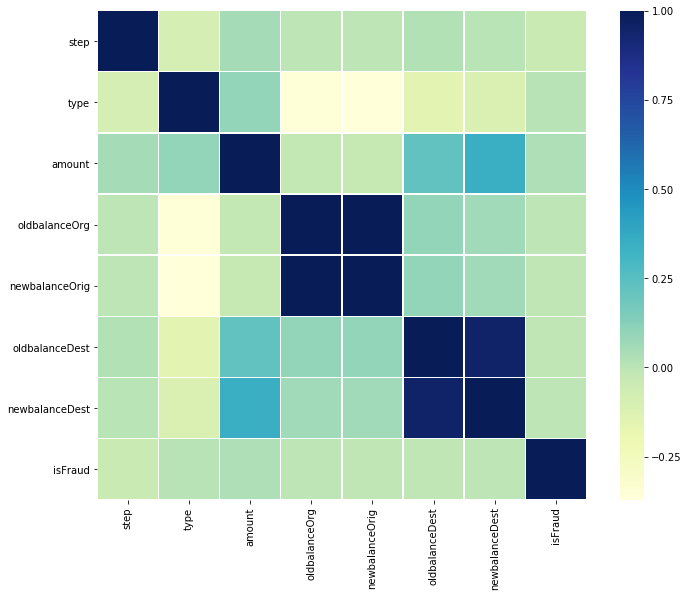

In [23]:
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, square=True, cmap='YlGnBu', linewidths=.5)
plt.show()

### <font color='red'>PB: Need help  </font>


In [27]:


#Testing if group sizes are different 

for col in df.loc[:,'amount':'newbalanceDest'].columns:
    print(col)
    print(stats.ttest_ind(
        df[df['type'] == 0][col],
        df[df['type'] == 1][col],
        df[df['type'] == 2][col],
        df[df['type'] == 3][col],
        df[df['type'] == 4][col]
    ))

amount


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/ops.py:1164: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


TypeError: invalid type comparison

In [55]:
# Two categorical variables 
# subsetting the original dataset as more informative

df_cat = data.loc[lambda df: df.step <= 12, 
    ['type', 'isFraud']
]
print("type category value count:\n", df_cat.type.value_counts(), "\nFraud category:\n", df_cat.isFraud.value_counts())



type category value count:
 PAYMENT     67724
CASH_OUT    60040
CASH_IN     37506
TRANSFER    15244
DEBIT        1597
Name: type, dtype: int64 
Fraud category:
 0    181970
1       141
Name: isFraud, dtype: int64


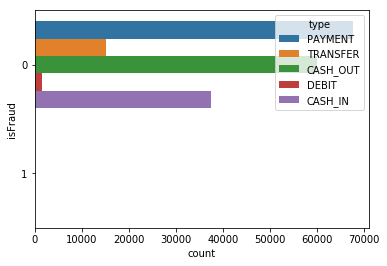

In [59]:
#sns.countplot(y='type', hue="isFraud", data=df_cat)
sns.countplot(y="isFraud", hue="type", data=df_cat)
plt.show()


## Creating features 

In [100]:
features = pd.get_dummies(data['type'])

#{'CASH_IN': 0, 'CASH_OUT': 1, 'DEBIT': 2, 'PAYMENT': 3, 'TRANSFER': 4}

# Filter method: crosstab between all fraud cases and where the wallet has been used only for purchasing merchandise
print(pd.crosstab(columns=data.isFraud, index=features.PAYMENT))


# Filter method: Creating a feature where the wallet has been used only for cash out or money transfer 
features['cashout_or_transfer'] = np.where((data['type'].isin(['CASH_OUT', 'TRAJNSFER'])), 1,0)

print(pd.crosstab(columns=data.isFraud, index=features.cashout_or_transfer))

# Strange that no purchase in a fraud case, but 1359 fraud cases with cash out or transfer
# I'd guess people try to purchase first 

isFraud        0     1
PAYMENT               
0        2110829  2699
1        1067772     0
isFraud                    0     1
cashout_or_transfer               
0                    2047282  1340
1                    1131319  1359


(1, 24)

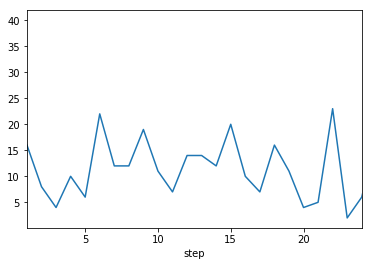

In [101]:
data.groupby('step').isFraud.sum().plot()
plt.xlim(1,24)

# Fraud transactions increase after 5 hours

In [103]:
# Creating features to see fraud cases within the first 5 hours. 

features['first_five'] = np.where(data['step'] <= 5, 1,0)

In [106]:
print(data.isFraud.groupby(features.first_five).count())

first_five
0    3175796
1       5504
Name: isFraud, dtype: int64


In [107]:
print(pd.crosstab(columns=data.isFraud, index=features.first_five))

isFraud           0     1
first_five               
0           3173141  2655
1              5460    44


In [108]:
# sixth to tenth hour
features['second_five'] = np.where(data['step'].between(6,10, inclusive=True), 1,0)
print(pd.crosstab(columns=data.isFraud, index=features.second_five))

isFraud            0     1
second_five               
0            3075464  2623
1             103137    76


In [112]:
#similarly, fraudulent transactions from the 11th hour to within 24 hours.

features['eleventh_to_24'] = np.where(data['step'].between(11, 24, inclusive=True), 1, 0)
print(pd.crosstab(columns=data.isFraud, index=features.eleventh_to_24))

isFraud               0     1
eleventh_to_24               
0               2713214  2548
1                465387   151


In [113]:
features.head()

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,cashout_or_transfer,first_five,second_five,eleventh_to_24
0,0,0,0,1,0,0,1,0,0
1,0,0,0,1,0,0,1,0,0
2,0,0,0,0,1,0,1,0,0
3,0,1,0,0,0,1,1,0,0
4,0,0,0,1,0,0,1,0,0


In [122]:
# generally the atm cash withdrawal limit is $500, 
#let's compare these with cases where cash_out is more than $500

features['cashout_within500'] = np.where(data['amount'] <= 500, 1,0)
print(pd.crosstab(columns=data.isFraud, index=features.cashout_within500))

features['cashout_500plus'] = np.where(data['amount'] >= 501, 1,0)
print(pd.crosstab(columns=data.isFraud, index=features.cashout_500plus))


isFraud                  0     1
cashout_within500               
0                  3141536  2680
1                    37065    19
isFraud                0     1
cashout_500plus               
0                  37127    19
1                3141474  2680


In [129]:
print(data[['amount', 'isFraud']].groupby(features.cashout_500plus).isFraud.sum())

cashout_500plus
0      19
1    2680
Name: isFraud, dtype: int64


In [130]:
#corrmat_1 = data.corr()

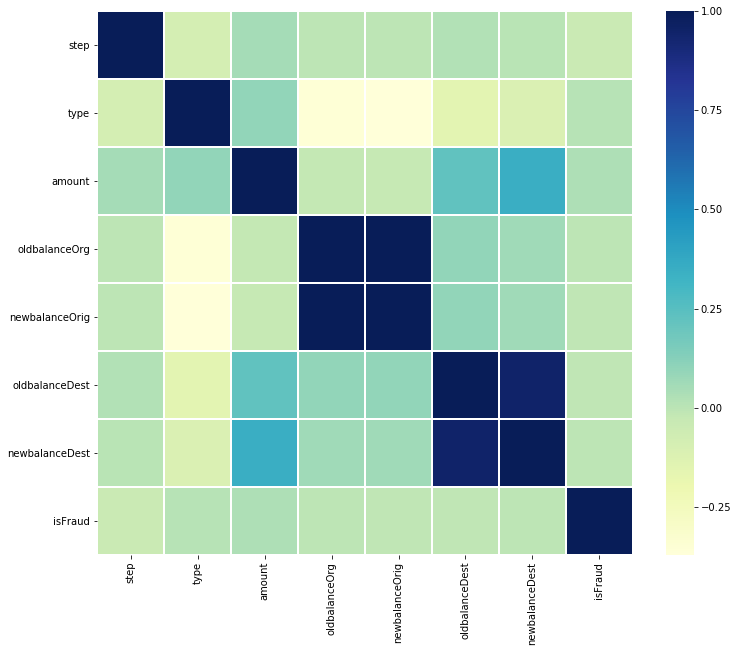

In [143]:
# Repeating previous corrplot, high correlation with 'oldbalanceOrig' and 'newbalanceOrig'
# and similarly, between 'oldbalanceDest' and 'newbalanceDest', Redundant
f,ax = plt.subplots(figsize=(12,10))
sns.heatmap(corrmat, linewidths=.8, cmap='YlGnBu')

In [152]:
# Normalizing by z-score. value-mean/sd. 

means = data[['oldbalanceOrg', 'newbalanceOrig']].mean(axis=0) #axis=0 means mean over row
stds = data[['oldbalanceOrg', 'newbalanceOrig']].std(axis=0)

#adding new feature for origin balance old and new
features['origin_old_new'] = ((data[['oldbalanceOrg', 'newbalanceOrig']]-means)/stds).mean(axis=1)
#mean(axis =1) is mean over column


# Adding new feature for destination balance old and new
means_dest = data[['oldbalanceDest', 'newbalanceDest']].mean(axis=0) #axis=0 means mean over row
stds_dest = data[['oldbalanceDest', 'newbalanceDest']].std(axis=0)

#adding new feature for origin balance old and new
features['dest_old_new'] = ((data[['oldbalanceDest', 'newbalanceDest']]-means_dest)/stds_dest).mean(axis=1)
#mean(axis =1) is mean over column


features.head()

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,cashout_or_transfer,first_five,second_five,eleventh_to_24,cashout_within500,cashout_500plus,origin_old_new,dest_old_new
0,0,0,0,1,0,0,1,0,0,0,1,-0.234993,-0.447316
1,0,0,0,1,0,0,1,0,0,0,1,-0.284586,-0.447316
2,0,0,0,0,1,0,1,0,0,1,0,-0.291509,-0.447316
3,0,1,0,0,0,1,1,0,0,1,0,-0.291509,-0.442715
4,0,0,0,1,0,0,1,0,0,0,1,-0.279305,-0.447316


In [155]:
# checking the new corrplot 

plotdf = data.loc[:, ['oldbalanceDest', 'newbalanceDest', 'oldbalanceOrg', 'newbalanceOrig']]

plotdf['origin_old_new'] = features['origin_old_new']
plotdf['dest_old_new'] = features['dest_old_new']


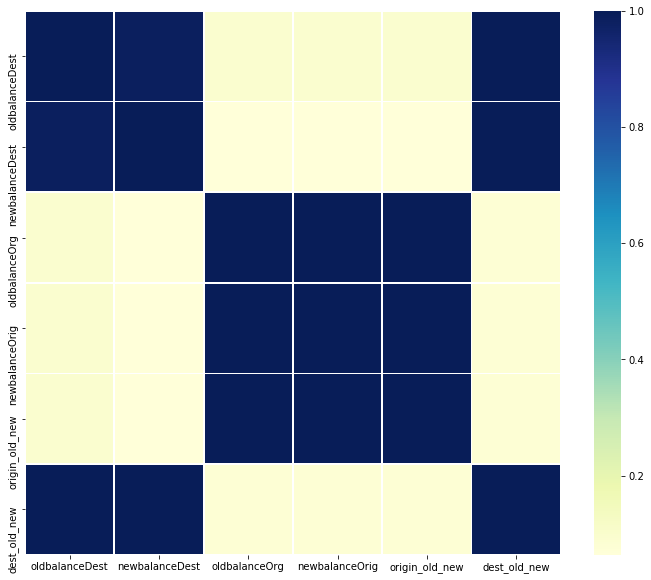

In [160]:
corrmat_2 = plotdf.corr()
f,ax = plt.subplots(figsize=(12,10))
sns.heatmap(corrmat_2, linewidths=.8, cmap='YlGnBu')



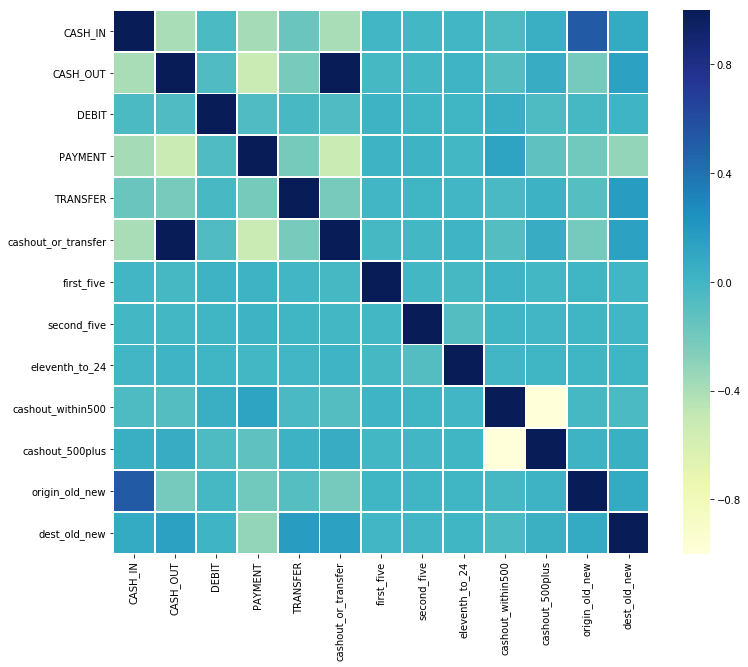

In [161]:

corrmat_3 = features.corr()
f,ax = plt.subplots(figsize=(12,10))
sns.heatmap(corrmat_3, linewidths=.8, cmap='YlGnBu')



### <font color='red'>PB: need help as I have lost perspective </font>

